<a href="https://colab.research.google.com/github/RudiksChess/UVG-DataScience-Notas-6-Semestre/blob/main/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3 - Segmentación de Especies con Cluster Analysis**


**Universidad del Valle de Guatemala**

Departamento de Computación - Data Science I - Catedrático: Luis Furlán

---

**Estudiante:** Rudik Roberto Rompich 

**Carrera:** Licenciatura en Matemática Aplicada 

**Carné:** 19857

---

Fecha de entrega: *** de agosto de 2021***

---

> **Instrucciones de los datos:** El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no o conocen, pueden leer sobre esta en: https://en.wikipedia.org/wiki/Iris_flower_data_set
. El conjunto de datos *iris-dataset.csv* tiene cuatro variables:  
* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
import pandas as pd 
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
url = "https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab3/iris-dataset.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data)
report= ProfileReport(df)

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Sección 1**

### Agrupen las flores por la forma de su sépalo:

In [6]:
df_sepalo = df.filter(["sepal_length","sepal_width"])
df_sepalo.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Empiecen por crear 2 "clusters".  Luego estandaricen los datos e intenten de nuevo.

#### Sin estandarizar

In [7]:
kmeans = KMeans(2)
kmeans.fit(df_sepalo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters_sepalo_identificados = kmeans.fit_predict(df_sepalo)
df_sepalo_con_clusters = df_sepalo.copy()
df_sepalo_con_clusters['Cluster'] = clusters_sepalo_identificados 
df_sepalo_con_clusters 

,sepal_length,sepal_width,Cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


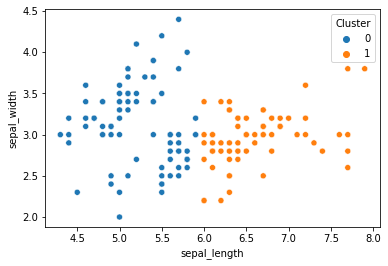

In [9]:
sns.scatterplot(df_sepalo_con_clusters["sepal_length"], df_sepalo_con_clusters["sepal_width"], hue= df_sepalo_con_clusters["Cluster"])

#### Estandarizados 

In [10]:
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(df_sepalo)
df_sepalos_estandarizados = pd.DataFrame(datos_escalados, columns= df_sepalo.columns.values)
df_sepalos_estandarizados

,sepal_length,sepal_width
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460
...,...,...
145,1.038005,-0.124958
146,0.553333,-1.281972
147,0.795669,-0.124958
148,0.432165,0.800654


In [11]:
kmeans_est = KMeans(2)
kmeans_est.fit(df_sepalos_estandarizados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters_sepalo_identificados_est = kmeans_est.fit_predict(df_sepalos_estandarizados)
df_sepalo_con_clusters_est = df_sepalos_estandarizados.copy()
df_sepalo_con_clusters_est['Cluster'] = clusters_sepalo_identificados_est
df_sepalo_con_clusters_est

,sepal_length,sepal_width,Cluster
0,-0.900681,1.032057,0
1,-1.143017,-0.124958,0
2,-1.385353,0.337848,0
3,-1.506521,0.106445,0
4,-1.021849,1.263460,0
...,...,...,...
145,1.038005,-0.124958,1
146,0.553333,-1.281972,1
147,0.795669,-0.124958,1
148,0.432165,0.800654,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


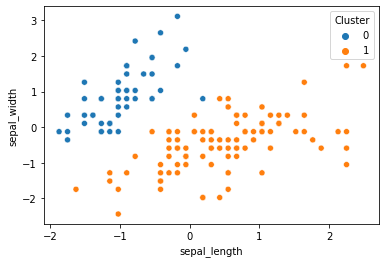

In [13]:
sns.scatterplot(df_sepalo_con_clusters_est["sepal_length"], df_sepalo_con_clusters_est["sepal_width"], hue= df_sepalo_con_clusters_est["Cluster"])

##### ¿Qué diferencias hay, si es que lo hay? 

La diferencia con el proceso de estandarización es que en comparación a los grupos originales; ahora un grupo tiene más elementos. Esto debido al "peso" que se les asignó a los valores y ya se definió de una mejor manera los *clusters*

### Utilicen el método del "codo" para determinar cuantos "clusters" hay. 

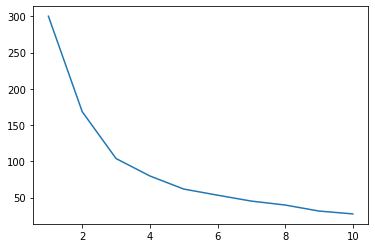

In [14]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Creamos una lista para almacenar los valores de SSE
sse = []
for k in range(1, 11):
    kmeans_t= KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_t.fit(df_sepalos_estandarizados)
    sse.append(kmeans_t.inertia_)

sns.lineplot(x=range(1,11), y=sse)

### Basado en la gráfica del "codo" realicen varias gráficas con el número adecuado de clusters que Uds creen mejor se ajusten a los datos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


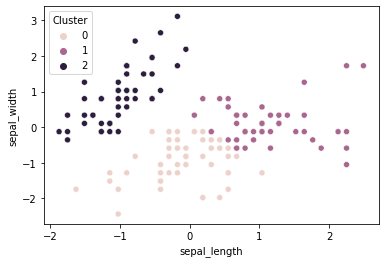

In [15]:
kmeans_f = KMeans(3)
kmeans_f.fit(df_sepalos_estandarizados)
clusters_sepalo_identificados_f = kmeans_f.fit_predict(df_sepalos_estandarizados)
df_sepalo_con_clusters_f = df_sepalos_estandarizados.copy()
df_sepalo_con_clusters_f['Cluster'] = clusters_sepalo_identificados_f
sns.scatterplot(df_sepalo_con_clusters_f["sepal_length"], df_sepalo_con_clusters_f["sepal_width"], hue= df_sepalo_con_clusters_f["Cluster"])

In [16]:
df_sepalo_con_clusters_f

,sepal_length,sepal_width,Cluster
0,-0.900681,1.032057,2
1,-1.143017,-0.124958,2
2,-1.385353,0.337848,2
3,-1.506521,0.106445,2
4,-1.021849,1.263460,2
...,...,...,...
145,1.038005,-0.124958,1
146,0.553333,-1.281972,0
147,0.795669,-0.124958,1
148,0.432165,0.800654,1


### Comparen sus soluciones con los datos reales, archivo: *iris-with-answers.csv*
**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

In [38]:
data_real = pd.read_csv("https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab3/iris-with-answers.csv")
interes_real = data_real["species"].map({'setosa':2,'virginica':1,'versicolor':0})
interes_prueba = df_sepalo_con_clusters_f["Cluster"]

iguales = 0
distintos = 0
for i in range(0,len(interes_real)): 
  if interes_real[i] == interes_prueba[i]:
    iguales += 1 
  else: 
    distintos +=1 

print(iguales, distintos)

118 32



### ¿Funcionó el clustering con la forma del sépalo?

El porcentaje de clasificación correcta fue: 

In [39]:
print(iguales/len(interes_prueba))

0.7866666666666666


El porcentaje de clasificación incorrecta fue: 

In [40]:
print(distintos/len(interes_prueba))

0.21333333333333335


## **Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas

### Agrupen las flores por la forma de su sépalo:

In [41]:
df_petal = df.filter(["petal_length","petal_width"])
df_petal.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Empiecen por crear 2 "clusters".  Luego estandaricen los datos e intenten de nuevo.

#### Sin estandarizar

In [21]:
kmeans = KMeans(2)
kmeans.fit(df_petal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
clusters_petal_identificados = kmeans.fit_predict(df_petal)
df_petal_con_clusters = df_petal.copy()
df_petal_con_clusters['Cluster'] = clusters_petal_identificados 
df_petal_con_clusters 

,petal_length,petal_width,Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


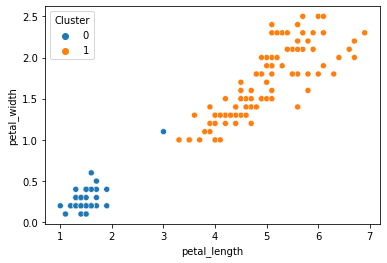

In [23]:
sns.scatterplot(df_petal_con_clusters["petal_length"], df_petal_con_clusters["petal_width"], hue= df_petal_con_clusters["Cluster"])

#### Estandarizados 

In [24]:
escalador = StandardScaler()
datos_escalados = escalador.fit_transform(df_petal)
df_petal_estandarizados = pd.DataFrame(datos_escalados, columns= df_petal.columns.values)
df_petal_estandarizados

,petal_length,petal_width
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977
...,...,...
145,0.819624,1.447956
146,0.705893,0.922064
147,0.819624,1.053537
148,0.933356,1.447956


In [25]:
kmeans_est = KMeans(2)
kmeans_est.fit(df_petal_estandarizados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
clusters_petal_identificados_est = kmeans_est.fit_predict(df_petal_estandarizados)
df_petal_con_clusters_est = df_petal_estandarizados.copy()
df_petal_con_clusters_est['Cluster'] = clusters_petal_identificados_est
df_petal_con_clusters_est

,petal_length,petal_width,Cluster
0,-1.341272,-1.312977,1
1,-1.341272,-1.312977,1
2,-1.398138,-1.312977,1
3,-1.284407,-1.312977,1
4,-1.341272,-1.312977,1
...,...,...,...
145,0.819624,1.447956,0
146,0.705893,0.922064,0
147,0.819624,1.053537,0
148,0.933356,1.447956,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


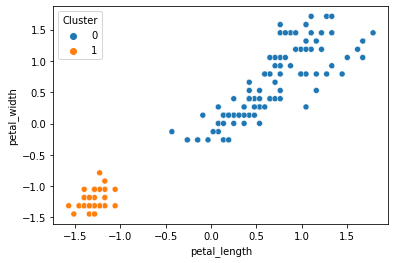

In [27]:
sns.scatterplot(df_petal_con_clusters_est["petal_length"], df_petal_con_clusters_est["petal_width"], hue= df_petal_con_clusters_est["Cluster"])

##### ¿Qué diferencias hay, si es que lo hay? 

La diferencia con el proceso de estandarización es que en comparación a los grupos originales; ahora un grupo tiene más elementos. Esto debido al "peso" que se les asignó a los valores y ya se definió de una mejor manera los *clusters*

### Utilicen el método del "codo" para determinar cuantos "clusters" hay. 

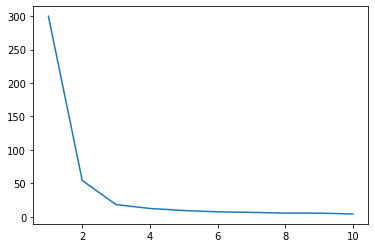

In [28]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Creamos una lista para almacenar los valores de SSE
sse2 = []
for k in range(1, 11):
    kmeans_t= KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_t.fit(df_petal_estandarizados)
    sse2.append(kmeans_t.inertia_)

sns.lineplot(x=range(1,11), y=sse2)

### Basado en la gráfica del "codo" realicen varias gráficas con el número adecuado de clusters que Uds creen mejor se ajusten a los datos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


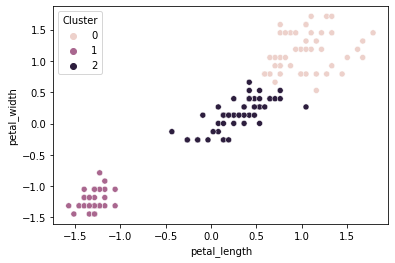

In [29]:
kmeans_f = KMeans(3)
kmeans_f.fit(df_petal_estandarizados)
clusters_petal_identificados_f = kmeans_f.fit_predict(df_petal_estandarizados)
df_petal_con_clusters_f = df_petal_estandarizados.copy()
df_petal_con_clusters_f['Cluster'] = clusters_petal_identificados_f
sns.scatterplot(df_petal_con_clusters_f["petal_length"], df_petal_con_clusters_f["petal_width"], hue= df_petal_con_clusters_f["Cluster"])

In [30]:
df_petal_con_clusters_f

,petal_length,petal_width,Cluster
0,-1.341272,-1.312977,1
1,-1.341272,-1.312977,1
2,-1.398138,-1.312977,1
3,-1.284407,-1.312977,1
4,-1.341272,-1.312977,1
...,...,...,...
145,0.819624,1.447956,0
146,0.705893,0.922064,0
147,0.819624,1.053537,0
148,0.933356,1.447956,0


### Comparen sus soluciones con los datos reales, archivo: *iris-with-answers.csv*
**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

In [42]:
data_real = pd.read_csv("https://raw.githubusercontent.com/RudiksChess/UVG-DataScience-Notas-6-Semestre/main/Lab3/iris-with-answers.csv")
interes_real = data_real["species"].map({'setosa':1,'virginica':0,'versicolor':2})
interes_prueba = df_petal_con_clusters_f["Cluster"]

iguales = 0
distintos = 0
for i in range(0,len(interes_real)): 
  if interes_real[i] == interes_prueba[i]:
    iguales += 1 
  else: 
    distintos +=1 


### ¿Funcionó el clustering con la forma del pétalo?

El porcentaje de clasificación correcta fue: 

In [43]:
print(iguales/len(interes_prueba))

0.96


El porcentaje de clasificación incorrecta fue: 

In [44]:
print(distintos/len(interes_prueba))

0.04


## **Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.

In [ ]:
! pip install kneed

In [35]:
from kneed import KneeLocator

In [36]:
kl1 = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl1.elbow

3

In [37]:
kl2 = KneeLocator(
    range(1, 11), sse2, curve="convex", direction="decreasing"
)

kl1.elbow

3

#### ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

No existe diferencia; aunque esto también podría ser debido a mi sesgo, ya que sabía que serían 3 clusters. Aunque esto solo afectó en el de sépalos, ya que el "codo" no estaba muy bien definido. Por otra parte, en el de pétalos sí estaba muy bien definido. Finalmente, con el paquete de *kneed* se ajustó a lo esperado: 3 clusters (iguales de datos reales). 

#### Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

El resultado que se obtuvo con el paquete de *kneed* es que deberían haber 3 clusters (como se esperaba). Por otra parte, se determinó que el modelo de *k-means* de pétalos es más preciso, ya que sobrepasa el 90\% de predicción.